import all libraries
create class 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils import resample

python class for normal logistic regression

In [41]:
class LogisticRegression:
    def __init__(self, weights=None, bias=None, learningRate=0.1, epochs=1000,numOfSelectedFeatures= None):
        self.weights = weights
        self.bias = bias
        self.learningRate = learningRate
        self.epochs = epochs
        self.numOfSelectedFeatures = numOfSelectedFeatures
    
    def loss (self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def setNumOfSelectedFeatures(self, numOfSelectedFeatures):
        self.numOfSelectedFeatures = numOfSelectedFeatures
    def setLearningRate(self, learningRate):
        self.learningRate = learningRate
    def setEpochs(self, epochs):
        self.epochs = epochs

    def fit(self, X, y):

        numOfSelectedFeatures = self.numOfSelectedFeatures
        numOfSamples, numOfFeatures = X.shape
    
        # Ensure numOfSelectedFeatures does not exceed numOfFeatures
        # if numOfSelectedFeatures is None or numOfSelectedFeatures > numOfFeatures:
        #     numOfSelectedFeatures = numOfFeatures

        numOfSelectedFeatures = numOfFeatures

        # Convert X to DataFrame to calculate correlation with column names
        X_df = pd.DataFrame(X)
        
        # Compute the correlation between each feature and the target
        correlations = np.abs(X_df.corrwith(pd.Series(y)))
        
        # Select top 'numOfSelectedFeatures' features based on correlation
        selectedFeatures = correlations.nlargest(numOfSelectedFeatures).index
        X_selected = X_df[selectedFeatures]
        X = X_selected.to_numpy()

        # Initialize weights and bias if not already initialized
        if self.weights is None:
            self.weights = np.zeros(numOfSelectedFeatures)
        if self.bias is None:
            self.bias = 0

        weights = self.weights
        bias = self.bias
        learningRate = self.learningRate
        epochs = self.epochs

        # Gradient descent for logistic regression
        for i in range(epochs):
            y_hat = self.__sigmoid(np.dot(X, weights) + bias)
            dw = (1 / numOfSamples) * np.dot(X.T, (y_hat - y))
            db = (1 / numOfSamples) * np.sum(y_hat - y)
            weights -= learningRate * dw
            bias -= learningRate * db

            # Uncomment to print loss at intervals
            # if i % 100 == 0:
            #     print(f'Epoch {i} loss: {self.loss(y, y_hat)}')

        # Save trained weights, bias, and selected features to the class
        self.weights = weights
        self.bias = bias
        self.selectedFeatures = selectedFeatures


    def predict(self, X):
        y_hat = self.__sigmoid(np.dot(X, self.weights) + self.bias)
        # make sure the output is binary
        y_hat = np.round(y_hat)
        return y_hat    

In [42]:
def dataPreProcessing_creditcard():
    df = pd.read_csv('../Dataset/creditcard.csv')
    numOfAttribuetes = df.shape[1]
    numOfRecords = df.shape[0]
    # print(f'Number of records: {numOfRecords}')
    # print(f'Number of attributes: {numOfAttribuetes}')
    # print(df.columns)
    # print(df.head(10))
    # print(df.describe())
    # print(df.info())

    #1 Checking for missing values  -----> use one less sum to see detailed missing values
    missingValues = df.isnull().sum().sum()
    # print(f'Missing values: {missingValues}')
    #2 Checking for duplicates
    duplicates = df.duplicated().sum()
    # print(f'Duplicates: {duplicates}')
    # duplicateRows = df[df.duplicated()]
    # print(f'Duplicate rows: {duplicateRows}')

    #3 replace missing values with mean ( numerical attributes)
    df.fillna(df.mean(numeric_only=True), inplace=True)

    #4 remove exact duplicates rows, keep the first one
    df.drop_duplicates(inplace=True)
    # print(f'Number of records after removing duplicates: {df.shape[0]}')

    #5 if any target value is missing, remove the record
    df.dropna(subset=['Class'], inplace=True)
    print(f'Number of records after removing missing target values: {df.shape[0]}')

    #6 split the data into features and target
    target_column = 'Class' 
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # print(X.shape)
    # print(y.shape)
    # print(y.value_counts())
    # print(X.columns)

    #7 display non numerical attributes
    nonNumericalAttributes = X.select_dtypes(include=['object']).columns
    # print(f'Non numerical attributes: {nonNumericalAttributes}')

    # 8 scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)

    #9 make x a dataframe again
    X = pd.DataFrame(scaled_X, columns=X.columns)

    return X, y

In [43]:
def dataPreProcessing_telco():
    df = pd.read_csv('../Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    numOfAttribuetes = df.shape[1]
    numOfRecords = df.shape[0]

#1 Checking for missing values  -----> use one less sum to see detailed missing values
    missingValues = df.isnull().sum().sum()
    print(f'Missing values: {missingValues}')

# print columns 
    print(df.columns)
#3 drop customerID
    df.drop('customerID', axis=1, inplace=True)

    X = df.drop('Churn', axis=1)
    y = df['Churn']

# 4 convert target to binary
    y = y.map({'Yes': 1, 'No': 0})

    # chagnge total charges to numeric
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    X.fillna(X.mean(numeric_only=True), inplace=True)

    X['MultipleLines'] = X['MultipleLines'].replace('No phone service', 'No')
    X['OnlineSecurity'] = X['OnlineSecurity'].replace('No internet service', 'No')


# 5 convert categorical to numerical
    X = pd.get_dummies(X, drop_first=True)

# 6 scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)

    X = pd.DataFrame(scaled_X, columns=X.columns)

    return X, y




In [44]:
def dataPreProcessing_adult():
    train_data = pd.read_csv('../Dataset/adult/adult.data', header=None)
    test_data = pd.read_csv('../Dataset/adult/adult.test', header=None, skiprows=1)

    # print(train_data.head())

    column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                    'marital-status', 'occupation', 'relationship', 'race',
                    'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                    'native-country', 'income']
    
    TARGET_COLUMN = 'income'
    
    train_data.columns = column_names
    test_data.columns = column_names

#  check for missing values
#     print(train_data.isnull().sum())
#     print(test_data.isnull().sum())

# # replace missing numerical values with mean
#     train_data.fillna(train_data.mean(numeric_only=True), inplace=True)
#     test_data.fillna(test_data.mean(numeric_only=True), inplace=True)
# # replace missing categorical values with mode
#     train_data.fillna(train_data.mode().iloc[0], inplace=True)
#     test_data.fillna(test_data.mode().iloc[0], inplace=True)

# print each unique categorical value in each column
    # for col in train_data.select_dtypes(include=['object']).columns:
    #     print(f'{col}: {train_data[col].unique()}')
    # for col in test_data.select_dtypes(include=['object']).columns:
    #     print(f'{col}: {test_data[col].unique()}')

# replace all categorical values of '?' with the mode
    for col in train_data.select_dtypes(include=['object']).columns:
        train_data[col] = train_data[col].replace(' ?', train_data[col].mode().iloc[0])
        test_data[col] = test_data[col].replace(' ?', test_data[col].mode().iloc[0])
# change the last column to binary
    train_data[TARGET_COLUMN] = train_data[TARGET_COLUMN].map({' <=50K': 0, ' >50K': 1})
    test_data[TARGET_COLUMN] = test_data[TARGET_COLUMN].map({' <=50K.': 0, ' >50K.': 1})

# print each unique categorical value in each column
    # for col in train_data.select_dtypes(include=['object']).columns:
    #     print(f'{col}: {train_data[col].unique()}')
    # for col in test_data.select_dtypes(include=['object']).columns:
    #     print(f'{col}: {test_data[col].unique()}')

# convert categorical to numerical
    train_data = pd.get_dummies(train_data, drop_first=True)
    test_data = pd.get_dummies(test_data, drop_first=True)

    print(train_data.shape)
    print(test_data.shape)

# make sure the test data has the same columns as the train data
    test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

    print(train_data.shape)
    print(test_data.shape)


# separate features and target
    X_train = train_data.drop(TARGET_COLUMN, axis=1)
    y_train = train_data[TARGET_COLUMN]
    X_test = test_data.drop(TARGET_COLUMN, axis=1)
    y_test = test_data[TARGET_COLUMN]

# scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
    X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

    return X_train, y_train, X_test, y_test


    

In [45]:
def test_train_split(X, y, test_size=0.2):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [46]:
from sklearn.utils import resample
import numpy as np

def bagging_samples(X_train, y_train):
    # set random seed for reproducibility
    np.random.seed(42)
    # number of samples (rows) in the training set
    n_samples = X_train.shape[0]
    
    # generate 9 bagging samples
    samples = [resample(X_train, y_train, n_samples=n_samples, replace=True) for _ in range(9)]
    
    return samples

In [47]:
def bagging_stacking(data_sets, X_val, y_val):

     # 2 - Train 9 different model with 9 different samples
    models = []
    for i in range(9):
        model = LogisticRegression()
        model.fit(data_sets[i][0], data_sets[i][1])
        models.append(model)

    # 3 -make predictions on the validation set
    y_preds = []
    for model in models:
        y_preds.append(model.predict(X_val))
    y_preds = np.array(y_preds)    

    # 4 build a meta model usiiing the predictions from the 9 models
    meta_model = LogisticRegression()
    meta_model.fit(y_preds.T, y_val)

    return models, meta_model

In [48]:
def stackig_predict(models, meta_model, X_test):
    y_preds_test = []
    for model in models:
        y_preds_test.append(model.predict(X_test))
    y_preds_test = np.array(y_preds_test)

    y_pred_meta = meta_model.predict(y_preds_test.T)
    return y_pred_meta

In [49]:
def majority_voting(models, X_test):

    y_preds_test = []
    for model in models:
        y_preds_test.append(model.predict(X_test))
    y_preds_test = np.array(y_preds_test)

    y_pred_majority = np.round(np.mean(y_preds_test, axis=0))
    return y_pred_majority

In [50]:
def LR_star(models, X_test):
# For LR, report average ± stdev for the 9 bagging LR learners
    y_preds_test = []
    for model in models:
        y_preds_test.append(model.predict(X_test))
    y_preds_test = np.array(y_preds_test)

    return y_preds_test


In [51]:
def calculate_metrics(y_test, y_pred):
# Accuracy Sensitivity Specificity Precision F1-score AUROC AUPR
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)
    aupr = average_precision_score(y_test, y_pred)

    # return as a dictionary
    return {'accuracy': accuracy, 'sensitivity': sensitivity, 'specificity': specificity, 'precision': precision, 'f1': f1, 'auroc': auroc, 'aupr': aupr}

main Function, make changes here to slect different dataset

DataSetLocation:

../Dataset/creditcard.csv
../WA_Fn-UseC_-Telco-Customer-Churn.csv

Missing values: 0
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
(32561, 98)
(16281, 97)
(32561, 98)
(16281, 98)


/home/saimon7/Documents/CSE-472-Machine-Learning/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Meta model metrics: {'accuracy': 0.7637737239727289, 'sensitivity': np.float64(0.0), 'specificity': np.float64(1.0), 'precision': np.float64(0.0), 'f1': np.float64(0.0), 'auroc': np.float64(0.5), 'aupr': np.float64(0.23622627602727106)}
Voting model metrics: {'accuracy': 0.7291935384804373, 'sensitivity': np.float64(0.1188247529901196), 'specificity': np.float64(0.9179734620024126), 'precision': np.float64(0.3094109681787407), 'f1': np.float64(0.17170768363704678), 'auroc': np.float64(0.518399107496266), 'aupr': np.float64(0.24492242899482736)}
LR_star model metrics:
                 Mean       Std
accuracy     0.725925  0.007059
sensitivity  0.123187  0.035087
specificity  0.912344  0.016269
precision    0.299860  0.027865
f1           0.173187  0.039584
auroc        0.517766  0.011570
aupr         0.244793  0.006955


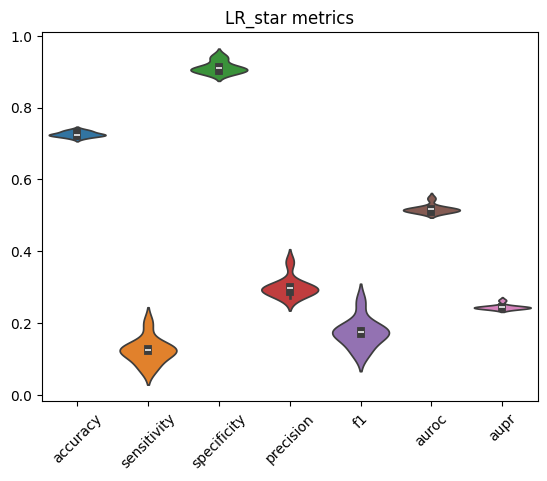

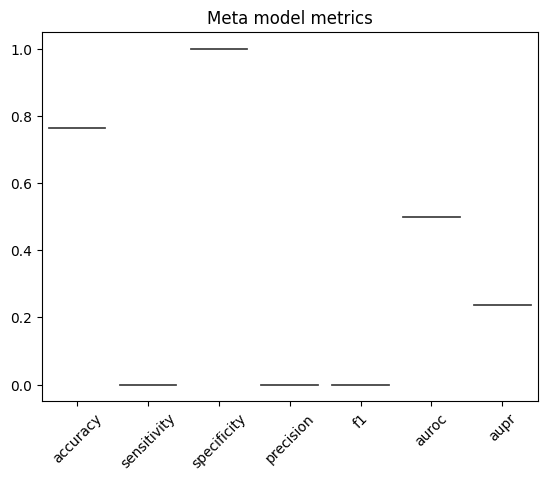

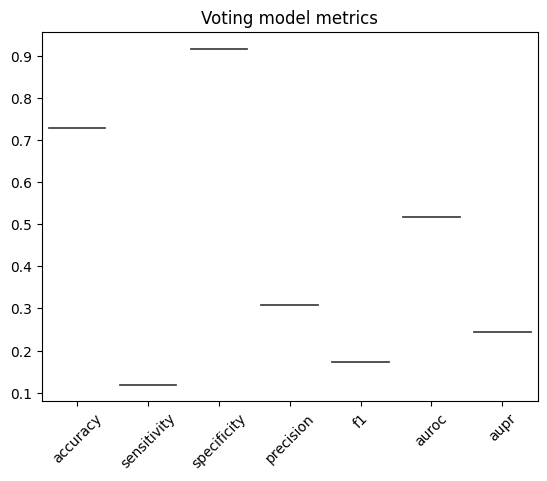

In [52]:
def main():

# 1 - Data Preprocessing for creditcard dataset

    # X,y = dataPreProcessing_creditcard()   # line 1 , uncomment this line to use creditcard dataset
    X, y = dataPreProcessing_telco()       # line 2 , uncomment this line to use telco dataset
    # X_train, X_test, y_train, y_test = test_train_split(X, y, test_size=0.2)  # line 3, uncomment this line to use telco or creditcard dataset

    X_train, y_train, X_test, y_test = dataPreProcessing_adult() # line 4, uncomment this line to use adult dataset


    X_train, X_val, y_train, y_val = test_train_split(X_train, y_train, test_size=0.2)
    data_sets = bagging_samples(X_train, y_train)

# 2  - Bagging and Stacking ensemble model preparation
    base_model, meta_model = bagging_stacking(data_sets, X_val, y_val)
# 3 - Predict the test set for stacking_ensemble
    y_pred_meta = stackig_predict(base_model, meta_model, X_test)
    y_pred_voting = majority_voting(base_model, X_test)
    y_pred_LR_star= LR_star(base_model, X_test)

    # make sure the output is binary
    y_pred_meta = np.round(y_pred_meta)
    y_pred_voting = np.round(y_pred_voting)
    y_pred_LR_star_binary = np.round(y_pred_LR_star).astype(int)


# 4 - Calculate matrics of the models
    metrics_meta = calculate_metrics(y_test, y_pred_meta)
    metrics_voting = calculate_metrics(y_test, y_pred_voting)
    
    if isinstance(metrics_meta, dict):
        metrics_meta_df = pd.DataFrame(metrics_meta, index=[0])
    else:
        metrics_meta_df = metrics_meta

    if isinstance(metrics_voting, dict):
        metrics_voting_df = pd.DataFrame(metrics_voting, index=[0])
    else:
        metrics_voting_df = metrics_voting


    metrics_LR_star_list = []
    for i in range(y_pred_LR_star_binary.shape[0]):
        metrics_LR_star_list.append(calculate_metrics(y_test, y_pred_LR_star_binary[i]))


    # Convert list of dictionaries to DataFrame
    metrics_LR_star_df = pd.DataFrame(metrics_LR_star_list)

    # Calculate mean and std deviation of metrics
    metrics_LR_star_mean = metrics_LR_star_df.mean()
    metrics_LR_star_std = metrics_LR_star_df.std()

    # Combine mean and standard deviation metrics
    final_metrics_LR_star = pd.concat([metrics_LR_star_mean, metrics_LR_star_std], axis=1)
    final_metrics_LR_star.columns = ['Mean', 'Std']

    # Print results
    print(f'Meta model metrics: {metrics_meta}')
    print(f'Voting model metrics: {metrics_voting}')
    print(f'LR_star model metrics:\n{final_metrics_LR_star}')

    # draw violin plot for LR_star
    sns.violinplot(data=metrics_LR_star_df)
    plt.xticks(rotation=45)
    plt.title('LR_star metrics')
    plt.show()

    # draw violin plot for meta model
    sns.violinplot(data=metrics_meta_df)
    plt.xticks(rotation=45)
    plt.title('Meta model metrics')
    plt.show()

    # draw violin plot for voting model
    sns.violinplot(data=metrics_voting_df)
    plt.xticks(rotation=45)
    plt.title('Voting model metrics')
    plt.show()

if __name__ == '__main__':
    main()